In [3]:
import math

import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

import talib as ta

### install talib
1. [install talib](https://blog.quantinsti.com/install-ta-lib-python/)
2. ```pip3 install --upgrade  --no-binary numpy==1.20.1 numpy==1.20.1```

In [4]:
start = "2018-01-01"
end = "2020-01-01"

In [5]:
assets = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]

In [6]:
for asset in assets:
    exec("{} = web.DataReader(asset, data_source='yahoo', start = start, end = end)".format(asset))

In [7]:
asset_list = [FB, AMZN, AAPL, NFLX, GOOG]

In [8]:
# Calculating the technical indicators with talib using the functions for momentum indicators
def indikator(asset):
    asset["RSI"] = ta.RSI(asset["Close"], timeperiod = 14)
    asset["ROC"] = ta.ROC(asset["Close"], timeperiod = 10) # On-Balance-Volume
    asset["%R"]  = ta.WILLR(asset["High"], asset["Low"], asset["Close"], timeperiod = 14)
    asset["OBV"] = ta.OBV(asset["Close"], asset["Volume"])
    asset["MACD"], asset["MACD_SIGNAL"], asset["MACD_HIST"] = ta.MACD(asset["Close"], fastperiod=12, slowperiod=26, signalperiod=9)
    # Moving Average Convergence/Divergence
    asset["Prediction"] = np.where(asset["Close"].shift(-5) > asset["Close"], 1, -1)

In [9]:
for asset in asset_list:
    indikator(asset)

In [10]:
df = FB.append((AMZN, AAPL, NFLX, GOOG))

In [27]:
df.dropna(inplace = True)

In [26]:
print(df)

                   High          Low         Open        Close      Volume  \
Date                                                                         
2018-02-20   177.949997   175.110001   175.770004   176.009995  21204900.0   
2018-02-21   181.270004   176.399994   176.710007   177.910004  23200800.0   
2018-02-22   180.210007   177.410004   178.699997   178.990005  18464200.0   
2018-02-23   183.389999   179.509995   179.899994   183.289993  19007300.0   
2018-02-26   185.660004   183.220001   184.580002   184.929993  17599700.0   
...                 ...          ...          ...          ...         ...   
2019-12-24  1350.260010  1342.780029  1348.500000  1343.560059    347500.0   
2019-12-26  1361.327026  1344.469971  1346.170044  1360.400024    667500.0   
2019-12-27  1364.530029  1349.310059  1362.989990  1351.890015   1038400.0   
2019-12-30  1353.000000  1334.020020  1350.000000  1336.140015   1050900.0   
2019-12-31  1338.000000  1329.084961  1330.109985  1337.020020  

In [28]:
# Splitting the data into X and y variables and perform a train test split
from sklearn.model_selection import train_test_split

X = df[["RSI", "ROC", "OBV","%R", "MACD", "MACD_SIGNAL", "MACD_HIST"]]
y = df[["Prediction"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, train_size = 0.8, test_size=0.2)

,RSI,ROC,OBV,%R,MACD,MACD_SIGNAL,MACD_HIST
Date,,,,,,,
2018-02-20,44.022479,-2.896392,-32454100.0,-68.621190,-1.764779,-0.725625,-1.039154
2018-02-21,46.519752,-3.993305,-9253300.0,-61.869206,-1.754503,-0.931401,-0.823102
2018-02-22,47.941419,-0.660444,9210900.0,-56.307781,-1.640303,-1.073181,-0.567122
2018-02-23,53.267977,6.824800,28218200.0,-31.242018,-1.189119,-1.096369,-0.092750
2018-02-26,55.152718,5.008229,45817900.0,-4.518618,-0.691249,-1.015345,0.324096
...,...,...,...,...,...,...,...
2019-12-24,58.411350,-0.081803,7523000.0,-44.151391,14.802758,16.455812,-1.653053
2019-12-26,65.243314,1.143478,8190500.0,-14.575307,14.930346,16.150718,-1.220372
2019-12-27,59.889141,0.119976,7152100.0,-45.269347,14.181301,15.756835,-1.575534


In [13]:
# Creating the model with the Random Forest classifier, choosing the gini criterion
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators = 1000, oob_score = True, criterion = "gini", random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

C:\Users\eaut2\AppData\Local\Temp/ipykernel_16648/1557407622.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
c:\users\eaut2\.virtualenvs\flathunter-iemp75iw\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [14]:
print("Correct prediction in %: ", accuracy_score(y_test, y_pred, normalize= True)*100)

Correct prediction in %:  71.27659574468085


In [15]:
#Getting the Wallmart company for the timeperiod 2020 to 2021
test_stock = web.DataReader("WBT", data_source="yahoo", start="2020-01-01", end = "2021-02-14")

#Performing the indicator function on the new data
indikator(test_stock)

#Dropping all NaN values so the model can make predictions on the new data
test_stock.dropna(inplace=True)

In [16]:
test_stock["predicted"] = model.predict(test_stock[["RSI", "ROC", "OBV","%R", "MACD", "MACD_SIGNAL", "MACD_HIST"]])

In [17]:
test_stock.head()

,High,Low,Open,Close,Volume,Adj Close,RSI,ROC,%R,OBV,MACD,MACD_SIGNAL,MACD_HIST,Prediction,predicted
Date,,,,,,,,,,,,,,,
2020-02-20,14.160,13.570,13.60,14.00,1009100,14.00,37.135261,-7.834099,-72.268912,-3558600.0,-0.384019,-0.252180,-0.131838,-1,-1
2020-02-21,14.045,13.730,13.90,14.01,1049400,14.01,37.363134,-7.033839,-71.060163,-2509200.0,-0.380889,-0.277922,-0.102967,-1,-1
2020-02-24,13.670,13.260,13.60,13.40,1386600,13.40,30.177361,-8.719351,-92.964854,-3895800.0,-0.422757,-0.306889,-0.115868,-1,1
2020-02-25,14.960,12.670,13.59,13.25,3156400,13.25,28.714907,-10.593790,-77.519382,-7052200.0,-0.462707,-0.338053,-0.124655,-1,1
2020-02-26,13.810,13.225,13.40,13.25,1575000,13.25,28.714907,-8.746559,-77.165357,-7052200.0,-0.488735,-0.368189,-0.120546,-1,1


In [18]:
def buy_sell(asset):
    BuyPrice = []
    SellPrice = []
    flag = -1
    counter = 0
    n=5
    
    for i in range(len(asset)):
        if asset["predicted"][i] == 1 and counter == 0:
            if flag != 1:
                BuyPrice.append(asset["Adj Close"][i])
                SellPrice.append(np.nan)
                flag = 1
            else:
                BuyPrice.append(np.nan)
                SellPrice.append(np.nan)
        elif asset["predicted"][i] == -1 and counter ==0:
            if flag !=0:
                BuyPrice.append(np.nan)
                SellPrice.append(asset["Adj Close"][i])
                flag = 0
            else:
                BuyPrice.append(np.nan)
                SellPrice.append(np.nan)
        else:
            BuyPrice.append(np.nan)
            SellPrice.append(np.nan)
            
        counter +=1
        if counter ==n:
            counter = 0
            
    return (BuyPrice, SellPrice)

In [19]:
buysell = buy_sell(test_stock)

In [20]:
test_stock["Buy"] = buysell[0]
test_stock["Sell"] = buysell[1]

In [21]:
#Replacing the first Sell signal by a NaN value
test_stock["Sell"][0] = np.nan

C:\Users\eaut2\AppData\Local\Temp/ipykernel_16648/211971331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_stock["Sell"][0] = np.nan


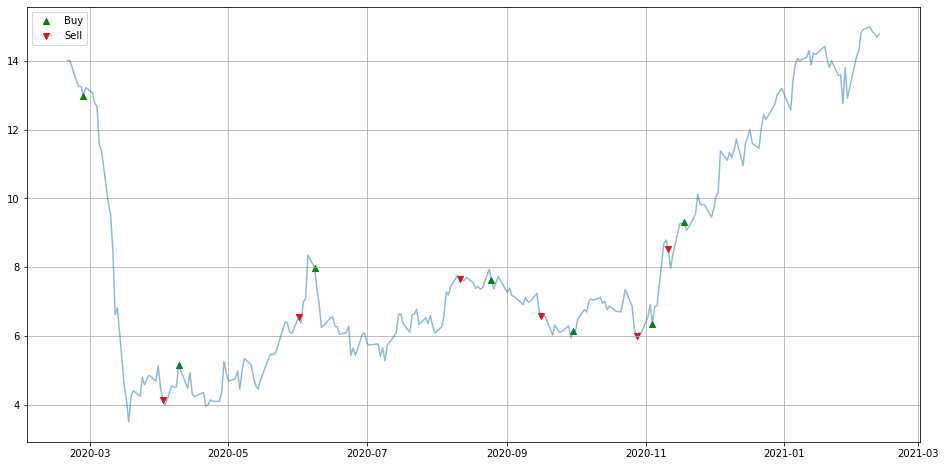

In [22]:
#Plotting our Signals on our time period
plt.figure(figsize=(16,8))
plt.scatter(test_stock.index, test_stock["Buy"], color = "green", label = "Buy", marker = "^", alpha=1)
plt.scatter(test_stock.index, test_stock["Sell"], color = "red", label = "Sell", marker = "v", alpha=1)
plt.plot(test_stock.index, test_stock["Adj Close"], alpha = 0.5)
plt.legend()
plt.grid()
plt.show()

In [23]:
def performance(data):
    performance = [1000000]
    num_stocks = 0
    for i in range(len(data)):
        if math.isnan(data["Buy"][i]) == False:
            num_stocks = performance[i]/data["Adj Close"][i]
            performance.append(num_stocks*data["Adj Close"][i])
        elif math.isnan(data["Sell"][i]) == False:
            cash = num_stocks * data["Adj Close"][i]
            performance.append(cash)
        else: 
            performance.append(performance[i])
            
    return performance

In [24]:
test_stock_performance = performance(test_stock)

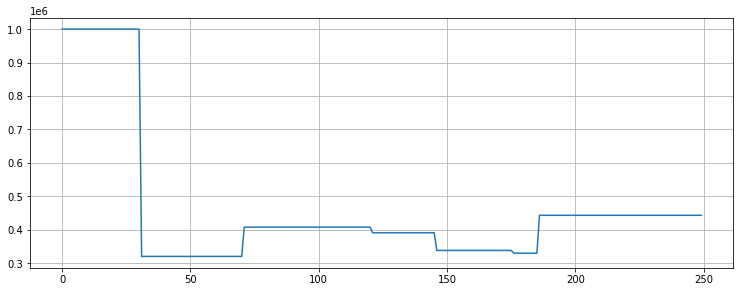

In [25]:
plt.figure(figsize= (12.6, 4.6))
plt.plot(test_stock_performance)
plt.grid()
plt.show()